In [5]:
import librosa.display
import matplotlib
import os
import pandas as pd
from pnp_synth.physical import ftm

folds = ["test", "train", "val"]
fold_dfs = {}

for fold in folds:
    csv_name = fold + "_param_v2.csv"
    csv_path = os.path.join("..", "data", csv_name)
    fold_df = pd.read_csv(csv_path)
    fold_df = fold_df.rename(columns={"Unnamed: 0": "ID"})
    fold_dfs[fold] = fold_df
    
full_df = pd.concat(fold_dfs.values()).sort_values(
    by="ID", ignore_index=False)
assert len(set(full_df["ID"])) == len(full_df)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       6.47224070e-09, 6.43502469e-09, 6.29454167e-09])

(80.0, 4000.0)

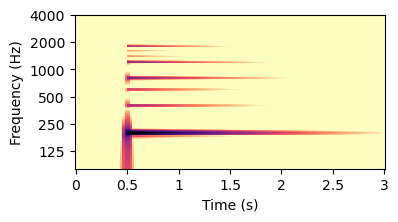

In [113]:
theta_keys = ["omega", "tau", "p", "D", "alpha"]
theta = {key: full_df[key].median() for key in theta_keys}
x = ftm.rectangular_drum(**theta, **ftm.constants)
x = np.pad(x, (ftm.constants["sr"]//2, 0), "constant")
x = librosa.util.fix_length(x, size=3*ftm.constants["sr"])

vqt_params = {"bins_per_octave": 36}
n_octaves = 7
spectrogram = librosa.vqt(x, sr=ftm.constants["sr"],
    n_bins=vqt_params["bins_per_octave"]*n_octaves, **vqt_params)
logspec = librosa.amplitude_to_db(np.abs(spectrogram), amin=1e-6)
plt.figure(figsize=(4, 2))
librosa.display.specshow(logspec,
    x_axis="s", y_axis="cqt_hz", sr=ftm.constants["sr"], cmap="magma_r",
    **vqt_params)
plt.ylabel("Frequency (Hz)")
plt.yticks([125, 250, 500, 1000, 2000, 4000], minor=False)
plt.yticks([], minor=True)
plt.ylim(80, 4000)

In [97]:
logspec.shape

(84, 130)